# 넥스트이지에서 제공하는 골프장 데이터를 분석

## 사용한 라이브러리

### 환경설정

In [2]:
import nltk 
# punkt, stopwords download
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
# !conda install -c conda-forge wordcloud

^C


In [1]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
import nltk
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import re, joblib
import konlpy
from konlpy.tag import Okt 
okt = Okt()
import string
# 한글 폰트 사용


## 사용한 데이터
- 컬럼을 한글화 시키고 NAN값을 제거하지 않은 상태에서 진행하였다.

In [5]:
df = pd.read_csv('C:\\workspace\\Next_Ez_jejudo\\data\\golflike\\골프장오리지널데이터_컬럼한글화2.csv')
df.head(3)

C:\Users\alsdn\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (6,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,골프장명,골프장지역명,골프장멤버십값,골프장유형값,사용일자,사용시간값,사용유형명,거주자금액,비거주자금액,결제수단명,...,판매업체명,예약자성별코드,예약자연령대코드,예약자거주지값,예약자평균값,예약자골프경력값,예약자평균사용값,예약자사용성향값,통화일자,통화시간
0,해비치CC,동부권,회원제+대중제,36,20210120.0,815.0,SKY,170000.0,170000.0,현장결제,...,해비치CC,1,50.0,비도민,8,NaN,NaN,NaN,NaN,NaN
1,아덴힐GC,서부권,대중제,18,20210121.0,809.0,왕이메,90000.0,135000.0,현장결제,...,아덴힐GC,1,50.0,비도민,8,NaN,NaN,NaN,NaN,NaN
2,아덴힐GC,서부권,대중제,18,20210126.0,823.0,왕이메,90000.0,135000.0,현장결제,...,아덴힐GC,1,50.0,도민,14,NaN,NaN,NaN,NaN,NaN


In [6]:
df.골프장지역명.value_counts()

동부권     18451
서부권     17618
제주시권     6890
서귀포권     2367
Name: 골프장지역명, dtype: int64

## 데이터 전처리
 - 데이터 전처리 부분에서 컨트롤하여 쉽게 나타 낼 수 있음

In [7]:
userwant = df.예약자사용성향값.copy()
userwant.dropna(inplace=True)
userwant.reset_index(inplace=True,drop=True)
userwant_list=userwant.values


sum_list = []
for i in range(len(userwant_list)):
    sum_list+=userwant_list[i].split(',')
len(sum_list)


28415

## 글자 빈도수

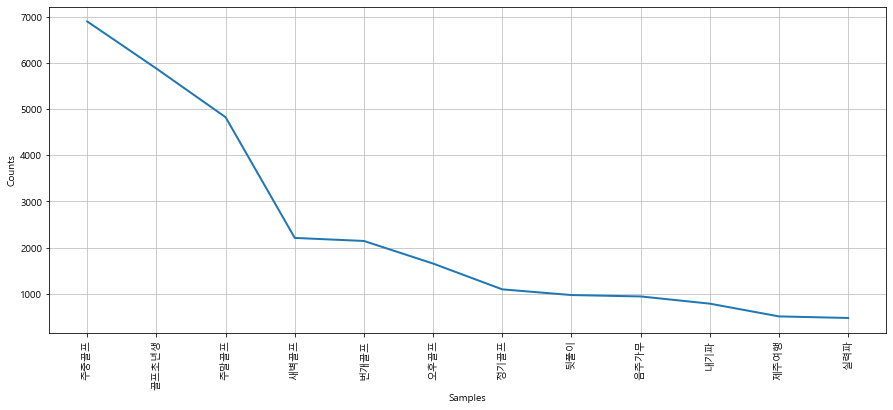

In [8]:
golf_use = nltk.Text(sum_list, name='골프사용성향')
plt.figure(figsize=(15,6))
golf_use.plot(50)
plt.show()

In [31]:
data = golf_use.vocab().most_common(300)
data[:100]

[('주중골프', 6895),
 ('골프초년생', 5876),
 ('주말골프', 4824),
 ('새벽골프', 2212),
 ('번개골프', 2146),
 ('오후골프', 1657),
 ('정기골프', 1099),
 ('뒷풀이', 976),
 ('음주가무', 946),
 ('내기파', 790),
 ('제주여행', 514),
 ('실력파', 480)]

## 워드클라우드화

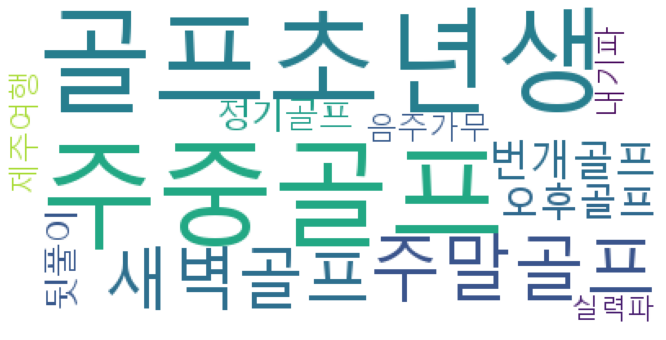

<Figure size 432x288 with 0 Axes>

In [34]:
wc = WordCloud(
    font_path='c:/Windows/Fonts/malgun.ttf',
    relative_scaling=0.00001,
    background_color='white'
).generate_from_frequencies(dict(data))

plt.figure(figsize=(12,6))
plt.imshow(wc)
plt.axis('off')
plt.show()
plt.savefig('golfwordcloud.png')

## 최종 결론
 - 제주도 내에서 골프를 이용하는 고객들은 주중골프를 좋아하는 걸로 알 수 있다.
 - 골프 초년생이 골프를 많이 한다.
 - 출근전 골프를 하는 사람들이 생각보다 많다.

In [ ]:
mask = np.array(Image.open('data/Alice_mask.png'))
plt.figure(figsize=(8,8))
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')

In [13]:
from wordcloud import ImageColorGenerator

mask = np.array(Image.open('circle.png'))
image_colors = ImageColorGenerator(mask)

In [14]:
wc = WordCloud(
    font_path='c:/Windows/Fonts/malgun.ttf',
    relative_scaling=0.3, mask=mask,
    background_color='white',
    min_font_size=1, max_font_size=100
).generate_from_frequencies(dict(data))
default_colors = wc.to_array()

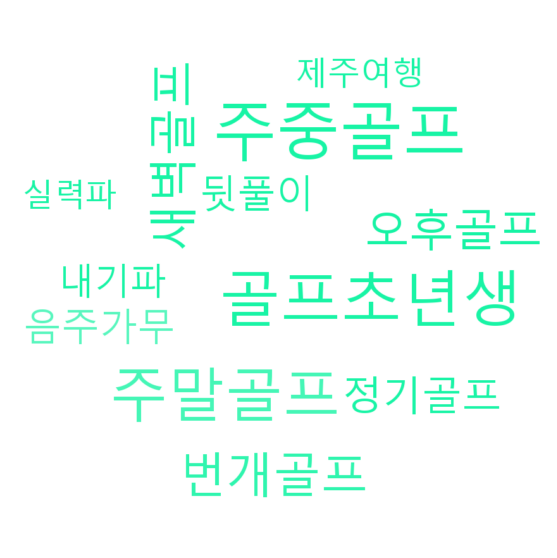

In [15]:
plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()
